In [1]:
# Importing libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from scipy import sparse
from scipy.stats import linregress

# Chapter 26: Bipartite Projections

# Exercise 26.1:
Perform a network projection of this bipartite network (ex_26.1) using simple weights. The unipartite projection should only contain nodes of type 1 (|V1| = 248). How dense is the projection?

In [2]:
# Load the edgelist into a graph
G = nx.read_edgelist("ex_26.1.txt")
print(G)

Graph with 858 nodes and 1249 edges


[NetworkX `sets` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.basic.sets.html)

<details>
<summary> Hint</summary>

```python
nodes = nx.algorithms.bipartite.basic.sets(G)
rows = sorted(list(nodes[0])) # The nodes in set 0
cols = sorted(list(nodes[1])) # The nodes in set 1

In [5]:
# Figure out which node is of which type
nodes = nx.algorithms.bipartite.basic.sets(G)
rows = sorted(list(nodes[0]))
cols = sorted(list(nodes[1]))

<details>
<summary> Hint</summary>

```python
if "a1" in rows:
    nodes = rows
    print("a1 is in rows, so nodes = rows")
else:
    nodes = cols

In [7]:
# Save nodes of type a in a variable "nodes"
nodes = rows

[NetworkX `biadjacency_matrix` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.matrix.biadjacency_matrix.html)

<details>
<summary> Hint</summary>

```python
T = nx.algorithms.bipartite.matrix.biadjacency_matrix(G, row_order = nodes)

In [12]:
# Get the bipartite adjacency matrix
AdjM = nx.algorithms.bipartite.matrix.biadjacency_matrix(G, row_order=nodes)

<details>
<summary> Hint</summary>

```python
U = T.dot(T.T)
U.setdiag(0)
U.eliminate_zeros()

In [14]:
# Multiply the bipartite adjacency matrix with its transpose to obtain the common neighbors between the nodes
U = AdjM.dot(AdjM.T)
U.setdiag(0)
U.eliminate_zeros()
print(U)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 25098 stored elements and shape (248, 248)>
  Coords	Values
  (0, 136)	1
  (0, 92)	1
  (0, 10)	1
  (0, 158)	1
  (0, 154)	3
  (0, 79)	3
  (0, 78)	2
  (0, 193)	3
  (0, 145)	2
  (0, 56)	2
  (0, 20)	2
  (0, 146)	2
  (0, 9)	6
  (1, 243)	1
  (1, 219)	1
  (1, 218)	1
  (1, 215)	1
  (1, 207)	1
  (1, 206)	1
  (1, 205)	1
  (1, 202)	1
  (1, 197)	1
  (1, 190)	1
  (1, 185)	1
  (1, 161)	1
  :	:
  (247, 41)	1
  (247, 39)	1
  (247, 37)	1
  (247, 35)	1
  (247, 33)	1
  (247, 31)	1
  (247, 30)	1
  (247, 29)	1
  (247, 23)	1
  (247, 22)	1
  (247, 21)	1
  (247, 20)	1
  (247, 19)	1
  (247, 18)	1
  (247, 16)	1
  (247, 15)	1
  (247, 14)	1
  (247, 13)	1
  (247, 12)	1
  (247, 10)	1
  (247, 7)	1
  (247, 5)	1
  (247, 4)	1
  (247, 3)	1
  (247, 1)	1


[NetworkX `from_scipy_sparse_array` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_scipy_sparse_array.html)

[NetworkX `relabel_nodes` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.relabel.relabel_nodes.html)

<details>
<summary> Hint</summary>

```python
G = nx.from_scipy_sparse_array(U)
G = nx.relabel_nodes(G,{i: nodes[i] for i in range(len(nodes))})
print(nx.density(G))

In [16]:
# Get the projected graph back and relabel to recover the original node ids
G = nx.from_scipy_sparse_array(U)
G = nx.relabel_nodes(G, {i: nodes[i] for i in range(len(nodes))})
print(G)

Graph with 248 nodes and 12549 edges


## Exercise 26.3:

Perform a network projection of the previously used bipartite network (ex_26.1) using hyperbolic weights. Draw a scatter plot comparing hyperbolic and simple weights.

In [17]:
# We take the code from the previous question and define a function
def simple(network, nodes):
   T = nx.algorithms.bipartite.matrix.biadjacency_matrix(network, row_order = nodes)
   U = T.dot(T.T)
   U.setdiag(0)
   U.eliminate_zeros()
   G = nx.from_scipy_sparse_array(U)
   return nx.relabel_nodes(G, {i: nodes[i] for i in range(len(nodes))})

In [18]:
# We Define a new function calculating hyperbolic weights.
# Basically, reuse the function above but instead of just T.T,
# The matrix inside .dot() needs to be normalized before being transposed and dotted (multiplied).

def hyper(network, nodes):
    T = nx.algorithms.bipartite.matrix.biadjacency_matrix(network, row_order=nodes)
    T = sparse.csr_matrix(T)

    # normalize columns, stay sparse (do not question this part, it fixes an issue with sparse vs dense matrices in online solution)
    col_sums = np.array(T.sum(axis=0)).flatten()
    col_sums[col_sums == 0] = 1 
    T_norm = T @ sparse.diags(1/col_sums)

    U = T.dot(T_norm.T)
    U.setdiag(0)
    U.eliminate_zeros()

    G = nx.from_scipy_sparse_array(U)
    return nx.relabel_nodes(G, {i: nodes[i] for i in range(len(nodes))})

In [19]:
# Reload the data into a graph and split the two node-types
G = nx.read_edgelist("ex_26.1.txt")
nodes = nx.algorithms.bipartite.basic.sets(G)
rows = sorted(list(nodes[0]))
cols = sorted(list(nodes[1]))
if "a1" in rows:
   nodes = rows
else:
   nodes = cols

In [20]:
print(len(rows), len(cols))

248 610


<details>
<summary> Hint</summary>

```python
G_simple = simple(G, nodes)
G_hyper = hyper(G, nodes)

all_edges = set(G_simple.edges) | set(G_hyper.edges)

In [21]:
# Generate the two bipartite projections using the functions we defined
G_simple = simple(G, nodes)
G_hyperbolic = hyper(G, nodes)
# Save all edges from both projections in a set "all_edges" using union (this operator: |)
all_edges = set(G_simple.edges) | set(G_hyperbolic.edges)

<details>
<summary> Hint</summary>

```python
df = pd.DataFrame(data = [(e, #the edge itself, e.g. (u, v)
                           G_simple.edges[e]["weight"] if e in G_simple.edges else 0, # weights from simple projection (0 if edge absent)
                           G_hyper.edges[e]["weight"] if e in G_hyper.edges else 0) # weights from hyper projection (0 if edge absent)
                         for e in all_edges], # loop through the union of edges from both projections
                         columns = ("edge", "simple", "hyper")) # name the dataframe columns

df.plot(kind = "scatter", x = "simple", y = "hyper", color = "crimson")
plt.show()

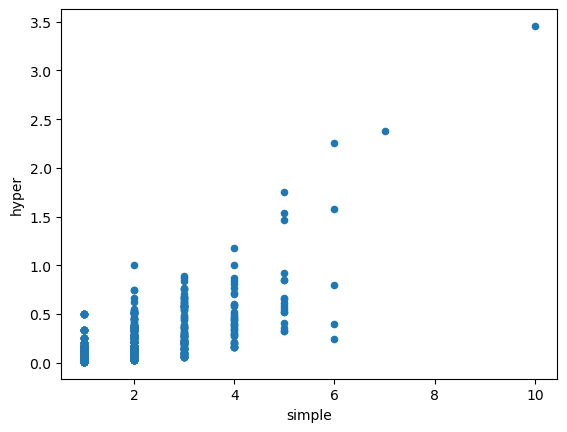

In [31]:
# Build a pandas dataframe with edge weights from both projections (set to 0 if edge is not present)
df = pd.DataFrame(data = [(e, 
                           G_simple.edges[e]['weight'] if e in G_simple.edges else 0,
                           G_hyperbolic.edges[e]['weight'] if e in G_hyperbolic.edges else 0)
                          for e in all_edges], columns = ('edge', 'simple', 'hyper'))
df.plot(kind = 'scatter', x = 'simple', y = 'hyper')
plt.show()

# Chapter 27: Network Backboning

## Exercise 27.1:

Plot the CCDF edge weight distribution of provided network. Calculate its average and standard deviation. 

**NOTE:** this is a directed graph!

In [32]:
# Load the data
G = nx.read_edgelist("ex_27.1.txt", data = [("weight", float),], create_using = nx.DiGraph())
print(G)

DiGraph with 168 nodes and 10362 edges


 [NetworkX `get_edge_attributes` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.get_edge_attributes.html)

<details>
<summary> Hint</summary>

```python
edgeweights = list(dict(nx.get_edge_attributes(G, "weight")).values())

In [34]:
# Get the weights
edgeweights = list(dict(nx.get_edge_attributes(G, 'weight')).values())

<details>
<summary> Hint</summary>

```python
wd = pd.DataFrame(list(Counter(edgeweights).items()), columns = ("weight", "count")).sort_values(by = "weight")
ccdf = wd.sort_values(by = "weight", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["weight", "ccdf"]].sort_values(by = "weight")
ccdf.plot(kind = "line", x = "weight", y = "ccdf", color = "#e41a1c", loglog = True)
plt.show()

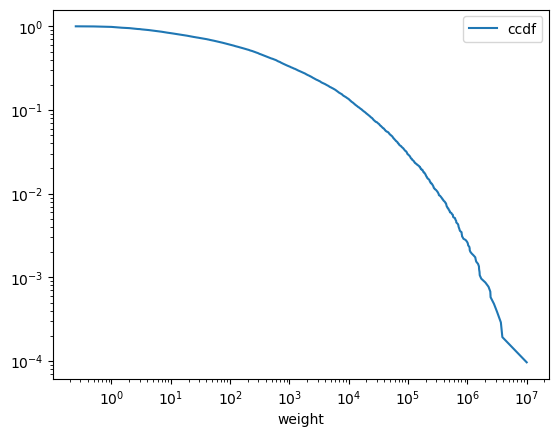

In [36]:
# Let's use our degree CCDF code for the edge weights
wd = pd.DataFrame(list(Counter(edgeweights).items()), columns = ("weight", "count")).sort_values(by = "weight")
ccdf = wd.sort_values(by = "weight", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["weight", "ccdf"]].sort_values(by = "weight")
ccdf.plot(kind = "line", x = "weight", y = "ccdf", loglog = True)
plt.show()

<details>
<summary> Hint</summary>

```python
edgeweights = np.array(edgeweights)
print("Edge weight average: %1.4f" % np.mean(edgeweights))
print("Edge weight stdev: %1.4f" % np.std(edgeweights))

In [40]:
# Average & stdev of the weights
edgeweights = np.array(edgeweights)
print(f'Average weight: {np.mean(edgeweights):.2f}')
print(f'St. Deviation of weights: {np.std(edgeweights):.2f}')

Average weight: 17191.33
St. Deviation of weights: 149924.38


## Exercise 27.3:

Can you calculate the doubly stochastic adjacency matrix of the network from Exercise 27.1? Does the calculation eventually converge? (Limit the normalization attempts to 1,000. If by 1,000 normalizations you don't have a doubly stochastic matrix, the calculation didn't converge)

 [NetworkX `to_numpy_array` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.to_numpy_array.html) 

<details>
<summary> Hint</summary>

```python
A = nx.to_numpy_array(G)

In [56]:
# We will reuse the graph G from above ex_27.1
# Let's start by getting the adjacency matrix of G
A = nx.to_numpy_array(G)

<details>
<summary> Hint</summary>

```python
attempts = 0
row_sums = A.sum(axis = 1)
while np.std(A.sum(axis = 1)) > 1e-12:
   A /= A.sum(axis = 1, keepdims=True)
   A /= A.sum(axis = 0, keepdims=True)
   attempts += 1
   if attempts > 1000:
      print("Calculation didn't converge. The matrix cannot be made doubly stochastic. Aborting.")
      break

print("Calculation converged. Here's A:")
print(A)

In [58]:
# If we want to get the doubly stochastic, we need to alternatively
# normalize by row and column sum. We stop only when the deviation
# from one is very little, thus the row/column sum is very close to
# one. We also need to keep track of how many times we performed
# the normalization. If we keep going back and forth between the
# same two values, it means we're not converging.
attempts = 0
row_sums = A.sum(axis = 1)
while np.std(A.sum(axis = 1)) > 1e-12:
    A /= A.sum(axis = 1, keepdims=True)
    A /= A.sum(axis = 0, keepdims=True)
    attempts += 1
    if attempts > 1000:
        print('Aborting.')
        break
        
print(A)

[[0.00000000e+00 9.29197199e-07 9.75734853e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.73760713e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.46183715e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 4.05688025e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.59041160e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.32560627e-06 3.66899981e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


# Chapter 29: Network Sampling

# Exercise 29.1:
Perform a random walk sampling of this network (ex_29.1). Sample 2,000 nodes (1% of the network) and all their connections (note: the sample will end up having more than 2,000 nodes).

[NetworkX `read_edgelist` documentation](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html)   

<details>
<summary> Hint</summary> 

```python
# Read the data
G = nx.read_edgelist("ex_29.1.txt", nodetype=int)
print(G)


In [59]:
# Read the data
G = nx.read_edgelist("ex_29.1.txt", nodetype = int)
print(G)

Graph with 196591 nodes and 950327 edges


[Python `set` documentation](https://docs.python.org/3/library/stdtypes.html#set)   
[Python `random.choice` documentation](https://docs.python.org/3/library/random.html#random.choice)  
[NetworkX `Graph.nodes` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.nodes.html)   

<details>
<summary> Hint</summary> 

```python
# Initialize sets for storing sampled nodes and edges
sampled_nodes = set()
sampled_edges = set()

# Choose a random starting node for the random walk
curnode = random.choice(list(G.nodes))
print(curnode)

In [60]:
# Initialize sets for storing sampled nodes and edges
s_nodes = set()
s_edges = set()
# Choose a random starting node for the random walk
curnode = random.choice(list(G.nodes))
print(curnode)

28535


[NetworkX `Graph.neighbors` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html)   
[Python `random.choice` documentation](https://docs.python.org/3/library/random.html#random.choice)   

<details>
<summary> Hint</summary> 

```python
# Continue walking until 2000 nodes are sampled
while len(sampled_nodes) <= 2000:
    neighbors = list(G.neighbors(curnode))
    
    # If this node hasn't been sampled before, add it and its edges
    if not curnode in sampled_nodes:
        sampled_nodes.add(curnode)
        
        # Add all edges from this node in a consistent (min, max) format
        sampled_edges |= set([(min(curnode, neighbor), max(curnode, neighbor)) for neighbor in neighbors])
    
    # Move to a random neighbor (random walk)
    curnode = random.choice(neighbors)


In [61]:
# Continue walking until 2000 nodes are sampled
while len(s_nodes) < 2000:
    neighbors = list(G.neighbors(curnode))
    # If this node hasn't been sampled before, add it and its edges
    if curnode not in s_nodes:    
        # Add all edges from this node in a consistent (min, max) format
        s_nodes.add(curnode)
        s_edges |= set([(min(curnode, neighbor), max(curnode, neighbor)) for neighbor in neighbors])
    # Move to a random neighbor (random walk)
    curnode = random.choice(neighbors)

[NetworkX `Graph` documentation](https://networkx.org/documentation/stable/reference/classes/graph.html#networkx.Graph)   

<details>
<summary> Hint</summary> 

```python
# Build the sampled graph from the collected edges
G_smpl = nx.Graph(list(sampled_edges))
print(len(G_smpl.nodes))

In [64]:
# Build the sampled graph from the collected edges
G_smpl = nx.Graph(list(s_edges))
print(len(G_smpl.nodes))
print(len(s_nodes))
# To not be confused. G_smpl is made from sampled edges, but for each new node we added ALL the edges that it connects to, which in turn contained other nodes as well.

62920
2000


Q: Why does the sample contain more than 2000 nodes?

# Exercise 29.2
Compare the CCDF of the degree distribution of your sample of the network from Exercise 29.1 with the one of the original network by fitting a log-log regression and comparing the exponents. You can take multiple samples from different seeds to ensure the robustness of your result.

In [65]:
# Function implementing the random walk logic from the previous question
def rw(G, n):
   sampled_nodes = set()
   sampled_edges = set()
   curnode = random.choice(list(G.nodes))
   while len(sampled_nodes) <= n:
      neighbors = list(G.neighbors(curnode))
      if not curnode in sampled_nodes:
         sampled_nodes.add(curnode)
         sampled_edges |= set([(min(curnode, neighbor), max(curnode, neighbor)) for neighbor in neighbors])
      curnode = random.choice(neighbors)
   return nx.Graph(list(sampled_edges))

In [66]:
# Function generating a CCDF, from previous exercises
def ccdf(dd):
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
   return ccdf

In [67]:
# Function performing a simple regression in log-log space
def dd_exponent(degdistr):
   logcdf = np.log10(degdistr[["k", "ccdf"]])
   slope, log10intercept, r_value, p_value, std_err = linregress(logcdf["k"], logcdf["ccdf"])
   return slope

In [68]:
# Read the data
G = nx.read_edgelist("ex_29.1.txt", nodetype = int)
print(G)

Graph with 196591 nodes and 950327 edges


[NetworkX `Graph.degree` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html)  
[`collections.Counter` documentation](https://docs.python.org/3/library/collections.html#collections.Counter)  

<details>
<summary> Hint</summary>
 

```python
G_ccdf = ccdf(Counter(dict(G.degree).values()))
print("Original Exponent: %1.4f" % dd_exponent(G_ccdf))

In [71]:
# Compute the CCDF of the original network's degree distribution 
# and fit its slope using our helper dd_exponent.  
G_ccdf = ccdf(Counter(dict(G.degree).values()))
print(f'{dd_exponent(G_ccdf):.4f}')

-1.6013


[`random.choice` documentation](https://docs.python.org/3/library/random.html#random.choice)  
[NetworkX `Graph.neighbors` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html)  

<details>
<summary> Hint</summary>


```python
# Let's take 100 samples and store their degree exponent in a list

# We repeat the random walk 100 times, each time sampling 2,000 nodes and building their CCDF.  
smpl_exponents = []
for _ in range(100):
   G_smpl = rw(G, 2000)
   G_smpl_ccdf = ccdf(Counter(dict(G_smpl.degree).values()))

   # We then calculate the fitted slope (degree exponent) for each sample and store them in a list.  
   G_smpl_ccdf = ccdf(Counter(dict(G_smpl.degree).values()))
   smpl_exponents.append(dd_exponent(G_smpl_ccdf))


In [72]:
# Let's take 100 samples and store their degree exponent in a list

# We repeat the random walk 100 times, each time sampling 2,000 nodes and building their CCDF.  
smpl_exponents = []
for _ in range(100):
    G_smpl = rw(G, 2000)
    G_smpl_ccdf = ccdf(Counter(dict(G_smpl.degree).values()))
    # We then calculate the fitted slope (degree exponent) for each sample and store them in a list.  
    smpl_exponents.append(dd_exponent(G_smpl_ccdf)) 

[`numpy.mean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)  
[`numpy.std` documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html)  

<details>
<summary> Hint</summary>


```python
# Compute the mean and standard deviation of the exponents from the 100 random walk samples.  
smpl_exponents_mean = np.mean(smpl_exponents)
smpl_exponents_std = np.std(smpl_exponents)
print("Sample Exponent: %1.4f (+/- %1.4f)" % (smpl_exponents_mean, smpl_exponents_std)) 

In [73]:
# Compute the mean and standard deviation of the exponents from the 100 random walk samples.  
smpl_exponents_mean = np.mean(smpl_exponents)
smpl_exponents_std = np.std(smpl_exponents)
print(f'Sample exponent: {smpl_exponents_mean} +/- {smpl_exponents_std}')

Sample exponent: -1.125057159540453 +/- 0.010468469869332043


The results show that the sample's degree exponent differs from the original, in this case, the sample exponent is noticeably lower (~1.125 vs 1.6).  